# Ejercicio 6
Para simular una variable aletoria con distribución N(mu, sigma) se realizan los siguientes pasos:

1) Se simula primero una variable |Z| donde Z es densidad N(0,1). <br>
2) Luego se multiplica por -1 con probabilidad 0.5 para obtener los valores negativos simetricos. <br>
3) Por último se multiplicará por sigma y se sumará mu. <br>

Se usa fy con distribución EXP(1).

La constante C se calcula de manera teorica y da un valor aproximado de 1.32

Para encontrarla se siguieron los pasos:
<br>
1) Se calcula máximo de fx / fy <br>
   (Al usar fy = EXP(1). El máximo ocurre al maximizar
   el exponente.)
<br>
2) C = fx(maximo) / fy(maximo)


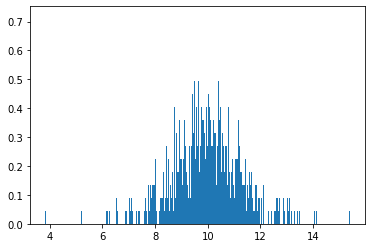

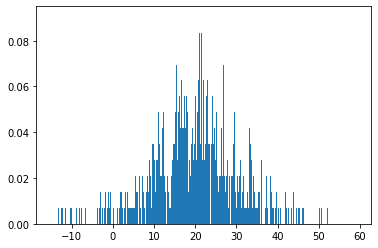

In [47]:
import random
import scipy
from scipy.stats import norm
from statistics import mean, variance
from math import exp, sqrt, fabs
from matplotlib import pyplot as plt

def normal(x, media=0, desvio=1):
    return norm.pdf(x, loc=media, scale=desvio)

def exponencial(x, lambd=1):
    return lambd * exp(-lambd * x)

def generar_distribucion_normal(media, desvio):
    resultado = []
    for i in range(0, N):
        r1 = random.expovariate(lambd=1)
        fx = normal(x=r1, media=0, desvio=1)
        r2 = random.random()
        if r2 < fx / c:
            signo = 1
            r3 = random.random()
            if r3 >= 0.5:
                signo = -1
            resultado.append(r1 * signo * desvio + media)
    return resultado


N = 10**4
c = 1.32

normal1 = generar_distribucion_normal(media=10, desvio=2)
plt.hist(normal1, bins=1000, density=True)
plt.show()

normal2 = generar_distribucion_normal(media=20, desvio=15)
plt.hist(normal2, bins=1000, density=True)
plt.show()

Calculo media y varianza de las distribuciones obtenidas

In [48]:
normal1_media = mean(normal1)
normal1_varianza = variance(normal1)
normal1_media, normal1_varianza

(9.988241083790243, 1.7957684854834408)

In [49]:
normal2_media = mean(normal2)
normal2_varianza = variance(normal2)
normal2_media, normal2_varianza

(20.216809999651524, 107.78023929386619)

Con las distribuciones normales creadas creo una nueva distribucion bivariada

# Ejercicio 7


Según enunciado se utiliza un nivel de significación de 5%.
El limite de la zona de aceptación/rechazo es 1.65

In [50]:
def kolmogorov_smirnov(muestra):
    k_mayor = 0
    k_menor = 0
    i = 1
    n = len(muestra)
    for x in sorted(muestra):
        valor_teorico = norm.cdf(x, loc=0, scale=1)
        k_mayor = max(k_mayor, fabs(i / n - valor_teorico))
        k_menor = max(k_menor, fabs(valor_teorico - (i -1) / n))
        i += 1

    k_mayor = sqrt(n) * k_mayor
    k_menor = sqrt(n) * k_menor
    k = max(k_mayor, k_menor)

    if  k <= 1.65:
        print ('Acepto')
    else:
        print ('Rechazo')

In [51]:
N = 10**4
muestra1 = generar_distribucion_normal(media=0, desvio=1)
kolmogorov_smirnov(muestra1)

Rechazo


In [52]:
N = 10**3
muestra2 = generar_distribucion_normal(media=0, desvio=1)
kolmogorov_smirnov(muestra2)

Acepto


In [53]:
N = 10**2
muestra3 = generar_distribucion_normal(media=0, desvio=1)
kolmogorov_smirnov(muestra3)

Acepto
